In [86]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [87]:
import numpy as np
import pandas as pd

In [88]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [90]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [91]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [92]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [93]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [94]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [97]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).first()
results

('2017-08-23', 0.0)

In [99]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [100]:
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
precipitation

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [107]:
precip_df = pd.DataFrame(precipitation)
precip_df.set_index('date', inplace = True)
precip_df.sort_index(inplace = True)
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


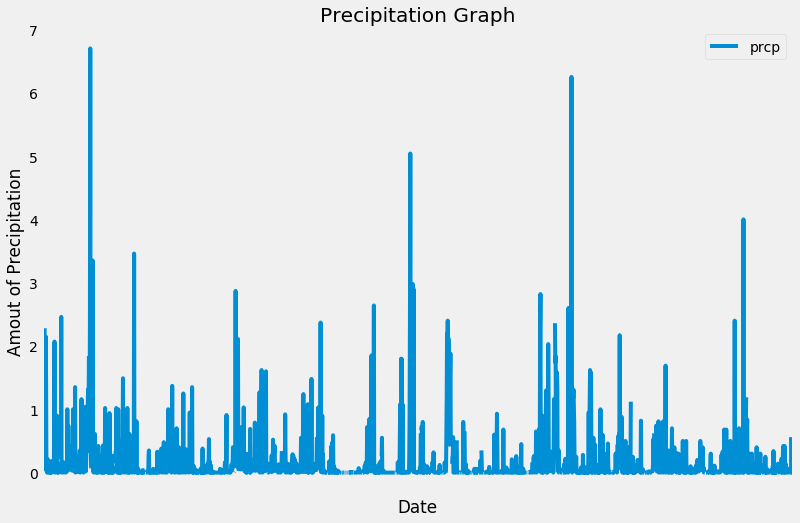

In [112]:
precip_df.plot(figsize = (12,8))
plt.title("Precipitation Graph")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Amout of Precipitation")
plt.xticks([])
plt.show()

In [103]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [80]:
# Design a query to show how many stations are available in this dataset?
stations_total = session.query(Station).count()
print(stations_total)

9


In [122]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# active = session.query(Measurement).\
# filter(Measurement.station).\
# order_by(Measurement.station).count()
active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [123]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
print(temp)

[(54.0, 85.0, 71.66378066378067)]


In [124]:
higher_obs = session.query(Station.name, Measurement.tobs).filter(Measurement.station==Station.station).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.tobs).all()
higher_obs

[('WAIHEE 837.5, HI US', 59.0),
 ('WAIHEE 837.5, HI US', 59.0),
 ('WAIHEE 837.5, HI US', 59.0),
 ('WAIHEE 837.5, HI US', 60.0),
 ('WAIHEE 837.5, HI US', 60.0),
 ('WAIHEE 837.5, HI US', 61.0),
 ('WAIHEE 837.5, HI US', 62.0),
 ('WAIHEE 837.5, HI US', 62.0),
 ('WAIHEE 837.5, HI US', 62.0),
 ('WAIHEE 837.5, HI US', 62.0),
 ('WAIHEE 837.5, HI US', 62.0),
 ('WAIHEE 837.5, HI US', 62.0),
 ('WAIHEE 837.5, HI US', 63.0),
 ('WAIHEE 837.5, HI US', 63.0),
 ('WAIHEE 837.5, HI US', 63.0),
 ('WAIHEE 837.5, HI US', 63.0),
 ('WAIHEE 837.5, HI US', 64.0),
 ('WAIHEE 837.5, HI US', 64.0),
 ('WAIHEE 837.5, HI US', 64.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 65.0),
 ('WAIHEE 837.5, HI US', 66.0),
 ('WAIHEE 837.5, HI US', 66.0),
 ('WAIHEE 837.5, HI US', 66.0),
 ('WAIHEE 837.5, HI US', 66.0),
 ('WAIHEE 837.5, HI US', 66.0),
 ('WAIHE

In [125]:
obs_df = pd.DataFrame(higher_obs)
obs_df.head()

,name,tobs
0,"WAIHEE 837.5, HI US",59.0
1,"WAIHEE 837.5, HI US",59.0
2,"WAIHEE 837.5, HI US",59.0
3,"WAIHEE 837.5, HI US",60.0
4,"WAIHEE 837.5, HI US",60.0


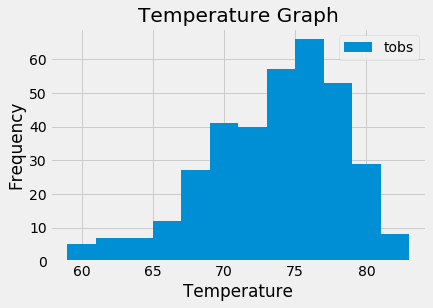

In [114]:
obs_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.title("Temperature Graph")
plt.show()